<a href="https://colab.research.google.com/github/Ahnkyuwon504/AI-modeling/blob/main/2024%EB%85%84%20%EC%B6%98%EC%B2%9C%EC%8B%9C%20%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/test_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 설치/모듈 임포트

In [2]:
# 필요 라이브러리 설치
!pip install -q pandas
!pip install -q numpy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q statsmodels

# 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 2. 데이터셋 로드

In [13]:
# 타이타닉 데이터셋 로드
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

# 3. 데이터셋 확인/전처리

In [16]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [15]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [17]:
# 각 열의 결측치 개수 확인
print(data.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [18]:
# 범주형 변수를 숫자형으로 변환 (Sex)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [19]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


# 4. 회귀분석

In [20]:
# 종속변수와 독립변수 설정
X = data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = data['Survived']

# 상수항 추가
X = sm.add_constant(X)

# 회귀분석 모델 적합
model = sm.Logit(y, X)
result = model.fit()

# 회귀분석 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.440210
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            6
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.3397
Time:                        04:50:29   Log-Likelihood:                -390.47
converged:                       True   LL-Null:                       -591.38
Covariance Type:            nonrobust   LLR p-value:                 1.125e-83
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.5400      0.504      5.044      0.000       1.553   

# 5. 시각화: 각 독립변수 -> 종속변수(생존율) 에 대한 영향도

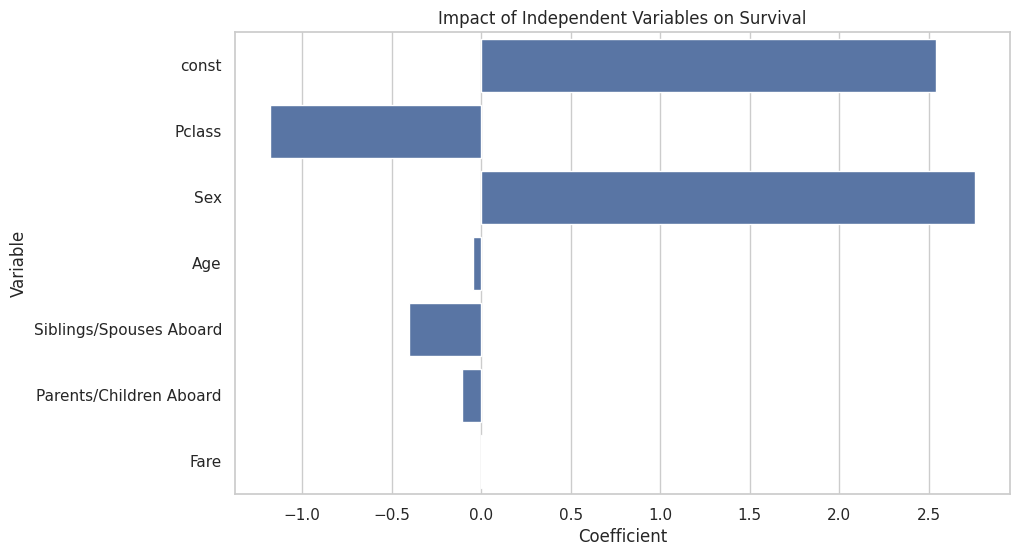

In [21]:
# 회귀계수 추출
coefficients = result.params

# 독립변수의 이름과 회귀계수를 데이터프레임으로 변환
coef_df = pd.DataFrame(coefficients, columns=['Coefficient'])
coef_df['Variable'] = coef_df.index

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df)
plt.title('Impact of Independent Variables on Survival')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.show()

In [ ]:
"""by kyu
const: 절편. 독립변수와 별개로 y절편으로 생각하면 됨. 생존율에 큰의미 없음
Pclass: 1등석,2등석,3등석 순으로 생존율이 높음. Pclass의 값이 음수이므로, 1->3으로 갈수록 생존율이 낮아진 것
Sex: 0을 male, 1을 female로 설정했고 Sex의 값이 양수로 높으므로 female이 생존율이 낮아진 것
그 외 아래 변수들은 Pclass, Sex에 비해 상대적으로 낮은 영향도
"""